In [1]:
!pip install affirmations


In [4]:
import requests

response = requests.get("https://www.affirmations.dev/")
data = response.json()
print(data["affirmation"])


If everything was easy you'd be bored


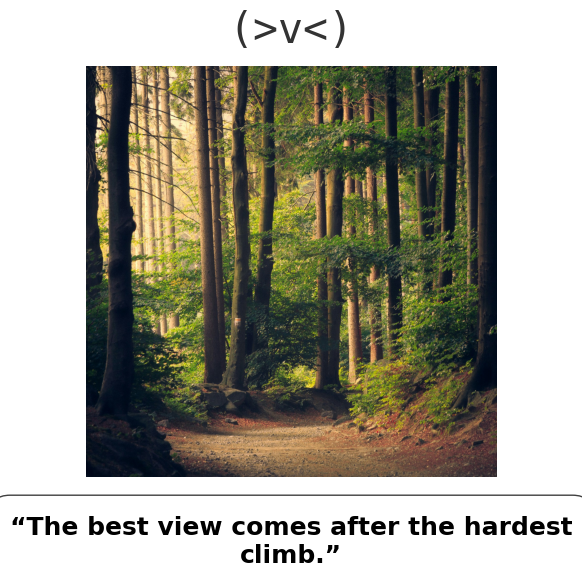

In [59]:
import requests
from PIL import Image, ImageFilter, ImageOps
from io import BytesIO
import random
import matplotlib.pyplot as plt

# --- quotes ---
quotes = [
    "“Keep going, you’re closer than you think.”",
    "“Bloom where you are planted.”",
    "“The best view comes after the hardest climb.”",
    "“You are enough, just as you are.”",
    "“Every sunrise brings new hope.”",
    "“Breathe. You’re doing just fine.”",
    "“Let the calm of nature heal your mind.”",
    "“One step at a time — progress, not perfection.”"
]

# --- sample image URLs ---
nature_urls = [
    #  Mountains & Landscapes
    "https://images.unsplash.com/photo-1506744038136-46273834b3fb",
    "https://images.unsplash.com/photo-1500530855697-b586d89ba3ee",
    "https://images.unsplash.com/photo-1501785888041-af3ef285b470",
    "https://images.unsplash.com/photo-1501785888041-af3ef285b470",
    "https://images.unsplash.com/photo-1500534314209-a25ddb2bd429",

    # Water / Ocean / Lakes
    "https://images.unsplash.com/photo-1507525428034-b723cf961d3e",
    "https://images.unsplash.com/photo-1518837695005-2083093ee35b",
    "https://images.unsplash.com/photo-1507525428034-b723cf961d3e",
    "https://images.unsplash.com/photo-1507525428034-b723cf961d3e",
    "https://images.unsplash.com/photo-1470770841072-f978cf4d019e",

    # Forests & Greenery
    "https://images.unsplash.com/photo-1501785888041-af3ef285b470",
    "https://images.unsplash.com/photo-1441974231531-c6227db76b6e",
    "https://images.unsplash.com/photo-1501785888041-af3ef285b470",
    "https://images.unsplash.com/photo-1501004318641-b39e6451bec6",
    "https://images.unsplash.com/photo-1501785888041-af3ef285b470",

    #  Skies / Minimal Calm Scenes
    "https://images.unsplash.com/photo-1506744038136-46273834b3fb",
    "https://images.unsplash.com/photo-1500534314209-a25ddb2bd429",
    "https://images.unsplash.com/photo-1493558103817-58b2924bce98",
    "https://images.unsplash.com/photo-1502082553048-f009c37129b9",
    "https://images.unsplash.com/photo-1506744038136-46273834b3fb"
]


# pick
image_url = random.choice(nature_urls)
quote = random.choice(quotes)
faces = ["(ᵔᴥᵔ)", "(◕‿◕✿)", "(づ｡◕‿‿◕｡)づ",  "(^v^)", "(>v<)", "(•‿•)","(ʘ‿ʘ)",
    "(¬‿¬)", "(ᵔᴥᵔ)", "(づ｡◕‿‿◕｡)づ",
    "(◕‿◕✿)", "(✿◠‿◠)", "(ﾉ◕ヮ◕)ﾉ*:･ﾟ✧",
    "(ʕ•ᴥ•ʔ)", "(ʕっ•ᴥ•ʔっ)", "UwU"]

# --- load image safely ---
try:
    r = requests.get(image_url, timeout=8)
    r.raise_for_status()
    img = Image.open(BytesIO(r.content)).convert("RGB")
except Exception as e:
    print(" Could not load image, using plain white background:", e)
    img = None

# ---  white fallback ---
if img:
  x=1
else:
    # fallback: simple soft white background
    bg_final = Image.new("RGB", (1200, 1200), (200, 200, 200))

# --- prepare the sharp centered image ---
if img:
    # choose size for the centered sharp image relative to bg
    inner_w_pct = 0.70   # fraction of width
    inner_h_pct = 0.70   # fraction of height
    inner_size = (int(bg_final.width * inner_w_pct), int(bg_final.height * inner_h_pct))
    inner_img = ImageOps.fit(img, inner_size, method=Image.LANCZOS, centering=(0.5, 0.5))
else:
    inner_img = None

# --- Display with matplotlib: background full-figure, centered inner image on top ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")

# show blurred white bg (full)
ax.imshow(bg_final, extent=[0, 1, 0, 1])

# show centered sharp image
if inner_img:
    w_frac = inner_img.width / bg_final.width
    h_frac = inner_img.height / bg_final.height
    left = (1 - w_frac) / 2
    right = left + w_frac
    bottom = (1 - h_frac) / 2 + 0.02
    top = bottom + h_frac
    ax.imshow(inner_img, extent=[left, right, bottom, top], zorder=2)
else:
    rect = plt.Rectangle((0.1, 0.2), 0.8, 0.6, linewidth=0, edgecolor=None, facecolor=(1,1,1,0.6))
    ax.add_patch(rect)

# add a small ASCII face near the top center
ax.text(0.5, 0.93, random.choice(faces), fontsize=30, ha="center", va="center", color="#333333", fontfamily="monospace", zorder=3)

# add the quote near bottom center with translucent box
ax.text(
    0.5, 0.06, quote,
    fontsize=18,
    color="black",
    ha="center",
    va="center",
    fontweight="bold",
    wrap=True,
    zorder=4,
    bbox=dict(facecolor="white", alpha=0.75, boxstyle="round,pad=0.8")
)

plt.tight_layout()
plt.show()
